In [1]:
import pandas as pd
import re

In [2]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_edt_indo.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_platform.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_startup.csv')
df4 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_revolusi.csv')
df5 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_edtech_industri.csv')

In [3]:
data = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)
data.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1662039772087599109,Fri May 26 10:15:35 +0000 2023,1711,From 1 206 companies valued over $1B in the wo...,1662039772087599109,NaN,NaN,en,"Bandung, Indonesia",61,57,370,https://twitter.com/gibranhuzaifah/status/1662...,351930241,gibranhuzaifah
1,1686593116558766080,Wed Aug 02 04:21:49 +0000 2023,12,Blessed to have the opportunity to share once ...,1686593116558766080,https://pbs.twimg.com/ext_tw_video_thumb/16865...,NaN,en,NaN,0,0,0,https://twitter.com/alvinsmiclat/status/168659...,1675117447555481600,alvinsmiclat
2,1383430498312101895,Sat Apr 17 14:41:48 +0000 2021,10,This is a drone that delivers books to Indones...,1383430498312101895,https://pbs.twimg.com/ext_tw_video_thumb/11029...,NaN,en,"Seattle, WA",0,0,9,https://twitter.com/2morrowknight/status/13834...,19478383,2morrowknight
3,1784779162345144735,Mon Apr 29 02:58:06 +0000 2024,2,Refocus an edtech company operating in the Phi...,1784779162345144735,NaN,NaN,en,Thailand,0,0,0,https://twitter.com/techzico/status/1784779162...,1720348793206697984,techzico
4,1330767570719313922,Mon Nov 23 06:58:07 +0000 2020,7,Edtech contenders in Indonesia. Worth noting t...,1330767570719313922,https://pbs.twimg.com/media/EnfV3Z_UYAEC-W9.jpg,NaN,en,Jakarta,0,1,0,https://twitter.com/faizrahmaaan/status/133076...,362278573,faizrahmaaan


In [4]:
df = data[['created_at', 'full_text', 'username']]
df

,created_at,full_text,username
0,Fri May 26 10:15:35 +0000 2023,From 1 206 companies valued over $1B in the wo...,gibranhuzaifah
1,Wed Aug 02 04:21:49 +0000 2023,Blessed to have the opportunity to share once ...,alvinsmiclat
2,Sat Apr 17 14:41:48 +0000 2021,This is a drone that delivers books to Indones...,2morrowknight
3,Mon Apr 29 02:58:06 +0000 2024,Refocus an edtech company operating in the Phi...,techzico
4,Mon Nov 23 06:58:07 +0000 2020,Edtech contenders in Indonesia. Worth noting t...,faizrahmaaan
...,...,...,...
336,Sun Aug 06 20:36:44 +0000 2023,@blixtgordon13 @Tomas_B Det är inte oproblemat...,GulzAgneta
337,Tue Dec 06 01:14:23 +0000 2022,Senior Software Engineer at Aptem We are a mis...,zobjobsGB
338,Tue Nov 20 07:24:39 +0000 2018,@mlackeus Sen kom kraven på digitalisering och...,Fossing_se
339,Wed Mar 11 15:42:29 +0000 2020,@tryberg @RosenkrantzT @DanskeGymnasier @Birgi...,Sahra_Josephine


In [5]:
df_fulltext = df[['full_text']]
df_fulltext

,full_text
0,From 1 206 companies valued over $1B in the wo...
1,Blessed to have the opportunity to share once ...
2,This is a drone that delivers books to Indones...
3,Refocus an edtech company operating in the Phi...
4,Edtech contenders in Indonesia. Worth noting t...
...,...
336,@blixtgordon13 @Tomas_B Det är inte oproblemat...
337,Senior Software Engineer at Aptem We are a mis...
338,@mlackeus Sen kom kraven på digitalisering och...
339,@tryberg @RosenkrantzT @DanskeGymnasier @Birgi...


## Preprocessing Data

In [6]:
# Function to remove links from text
def remove_links(text):
    return re.sub(r'http\S+', '', text)

# Function to remove tags from text
def remove_tags(text):
    return re.sub(r'<.*?>', '', text)

# Function to remove non-alphabetic characters from text
def remove_non_alphabetic(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)

# Preprocess the text column
df['full_text'] = df['full_text'].apply(remove_links)
df['full_text'] = df['full_text'].apply(remove_tags)
df['full_text'] = df['full_text'].apply(remove_non_alphabetic)

df.head()

<ipython-input-6-2b7cf2af2b6c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['full_text'] = df['full_text'].apply(remove_links)
<ipython-input-6-2b7cf2af2b6c>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['full_text'] = df['full_text'].apply(remove_tags)
<ipython-input-6-2b7cf2af2b6c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

,created_at,full_text,username
0,Fri May 26 10:15:35 +0000 2023,From companies valued over B in the world c...,gibranhuzaifah
1,Wed Aug 02 04:21:49 +0000 2023,Blessed to have the opportunity to share once ...,alvinsmiclat
2,Sat Apr 17 14:41:48 +0000 2021,This is a drone that delivers books to Indones...,2morrowknight
3,Mon Apr 29 02:58:06 +0000 2024,Refocus an edtech company operating in the Phi...,techzico
4,Mon Nov 23 06:58:07 +0000 2020,Edtech contenders in Indonesia Worth noting th...,faizrahmaaan


In [11]:
df.to_csv("/content/drive/MyDrive/Colab Notebooks/Analisis Sentimen EdTech Industry/preprocessed_dataset.csv", index=False)

In [7]:
import pandas as pd
from textblob import TextBlob

# Load the data from the CSV file
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Analisis Sentimen EdTech Industry/preprocessed_dataset.csv")

# Function to determine sentiment and label
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity < 0:
        return "Negative"
    else:
        return "Neutral"

# Add a new column for sentiment labels
dataset["Sentiment"] = dataset["full_text"].apply(get_sentiment)

# Save the labeled data to a new CSV file
dataset.to_csv("/content/drive/MyDrive/Colab Notebooks/Analisis Sentimen EdTech Industry/labeled_dataset.csv", index=False)

print("Sentiment labeling completed. Labeled data saved to labeled_data.csv.")

Sentiment labeling completed. Labeled data saved to labeled_data.csv.


In [8]:
labeled_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Analisis Sentimen EdTech Industry/labeled_dataset.csv")

# Count the occurrences of each sentiment label
sentiment_counts = labeled_data["Sentiment"].value_counts()

print("Sentiment distribution:")
print(sentiment_counts)

Sentiment distribution:
Sentiment
Neutral     257
Positive     66
Negative     18
Name: count, dtype: int64


In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertModel

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [10]:
!pip install transformers

## Data Preparation

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split

def load_and_split_data(file_path, test_size=0.2, shuffle=True):
    df = pd.read_csv(file_path)
    train_data, test_data = train_test_split(df, test_size=test_size, shuffle=shuffle)
    return train_data, test_data

# Example usage:
file_path = '/content/drive/MyDrive/Colab Notebooks/Analisis Sentimen EdTech Industry/labeled_dataset.csv'
train_data, test_data = load_and_split_data(file_path, test_size=0.2, shuffle=True)
train_data.head(5)

,created_at,full_text,username,Sentiment
208,Tue Feb 27 12:20:40 +0000 2024,Inovasi terbaru di MI Syamsul Huda Dengan smar...,MISyamsulHuda,Positive
166,Mon Mar 02 05:59:10 +0000 2015,Kelase Bersiap Ekspansi Ke Asia Tenggara Kelas...,nataliardianto,Positive
170,Mon Sep 15 12:47:58 +0000 2014,Platform Belajar Online Quipper School Kini Te...,Tekno_me,Neutral
105,Thu Apr 09 03:32:37 +0000 2020,Buat platform pembelajaran online apps website...,zm_rsd,Negative
291,Fri Aug 11 13:16:16 +0000 2023,Masalahnya secara konseptual edtech berarti ak...,_palungmariana,Neutral


## Unique Emotions

In [12]:
le = LabelEncoder()
train_data.loc[:, 'Sentiment'] = le.fit_transform(train_data['Sentiment'])
test_data.loc[:, 'Sentiment'] = le.transform(test_data['Sentiment'])

## Emotion Dataset

In [13]:
class EmotionDataset(Dataset):
    def __init__(self, df, tokenizer, max_len):
        self.df = df.reset_index(drop=True)  # Reset the index to ensure sequential values
        self.tokenizer = tokenizer
        self.max_len = max_len
    def __len__(self):
        return len(self.df)
    def __getitem__(self, index):
        essay = str(self.df.loc[index, 'full_text'])
        emotion = self.df.loc[index, 'Sentiment']
        encoding = self.tokenizer.encode_plus(
            essay,
            add_special_tokens=True,
            truncation=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt',
        )
        return {
            'full_text': essay,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'Sentiment': torch.tensor(emotion, dtype=torch.long)
        }

## Tokenizer

In [14]:
# create an instance of the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [15]:
# set the batch size
batch_size = 8

# set the maximum sequence length
max_len = 150

# create data loaders for the training and validation sets
train_dataset = EmotionDataset(train_data, tokenizer, max_len)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = EmotionDataset(test_data, tokenizer, max_len)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

## Model

In [16]:
import torch.nn as nn
from transformers import BertModel

class BertSentimentClassifier(nn.Module):
    def __init__(self, bert_model_name, num_classes):
        super(BertSentimentClassifier, self).__init__()

        self.bert = BertModel.from_pretrained(bert_model_name)
        self.fc1 = nn.Linear(self.bert.config.hidden_size, 64)
        self.dropout = nn.Dropout(0.2)
        self.fc2 = nn.Linear(64, num_classes)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        pooled_output = self.dropout(pooled_output)  # Apply dropout once
        output = self.fc1(pooled_output)
        logits = self.fc2(output)

        return logits

In [17]:
bert_model_name = "bert-base-cased"
num_classes = train_data["Sentiment"].nunique()
model = BertSentimentClassifier(bert_model_name, num_classes)

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

In [18]:
criterion = nn.CrossEntropyLoss()

## Training

In [19]:
def train(model, data_loader, optimizer, criterion, device):
    model.train()
    total_loss, total_accuracy = 0, 0
    for data in tqdm(data_loader):
        input_ids = data['input_ids'].to(device)
        attention_mask = data['attention_mask'].to(device)
        labels = data['Sentiment'].to(device)

        optimizer.zero_grad()

        outputs = model(input_ids, attention_mask)

        loss = criterion(outputs, labels)
        total_loss += loss.item()

        logits = outputs.detach().cpu().numpy()
        label_ids = labels.to('cpu').numpy()

        total_accuracy += flat_accuracy(logits, label_ids)

        loss.backward()
        optimizer.step()

    # calculate the average loss
    avg_loss = total_loss / len(data_loader)
    avg_acc = total_accuracy / len(data_loader)


    return avg_loss, avg_acc

In [20]:
def evaluate(model, data_loader, criterion, device):
    # set the model to eval mode
    model.eval()

    # initialize the loss and accuracy variables
    total_loss = 0
    total_accuracy = 0

    # iterate over the data loader
    for data in tqdm(data_loader):
        # move the inputs to the device
        input_ids = data['input_ids'].to(device)
        attention_mask = data['attention_mask'].to(device)
        labels = data['Sentiment'].to(device)

        # disable gradient computation
        with torch.no_grad():
            # get the model's predictions
            outputs = model(input_ids, attention_mask)

            # get the loss
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            # calculate the number of correct predictions
            logits = outputs.detach().cpu().numpy()
            label_ids = labels.to('cpu').numpy()

            total_accuracy += flat_accuracy(logits, label_ids)

    # calculate the average loss and accuracy
    avg_loss = total_loss / len(data_loader)
    accuracy = total_accuracy / len(data_loader)

    return avg_loss, accuracy

In [21]:
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

Epoch 1


100%|██████████| 9/9 [00:00<00:00, 13.19it/s]


Train Loss: 0.7199 | Train Acc: 0.7353 | Val Loss: 0.6505 | Val Acc: 0.7750
Epoch 2


100%|██████████| 9/9 [00:00<00:00, 12.90it/s]


Train Loss: 0.5563 | Train Acc: 0.8051 | Val Loss: 0.6392 | Val Acc: 0.7472
Epoch 3


100%|██████████| 9/9 [00:00<00:00, 13.07it/s]


Train Loss: 0.4186 | Train Acc: 0.8640 | Val Loss: 0.6482 | Val Acc: 0.7611
Epoch 4


100%|██████████| 9/9 [00:01<00:00,  8.23it/s]


Train Loss: 0.3320 | Train Acc: 0.8897 | Val Loss: 0.5614 | Val Acc: 0.8528
Epoch 5


100%|██████████| 9/9 [00:00<00:00, 12.83it/s]


Train Loss: 0.2274 | Train Acc: 0.9265 | Val Loss: 0.8719 | Val Acc: 0.7250


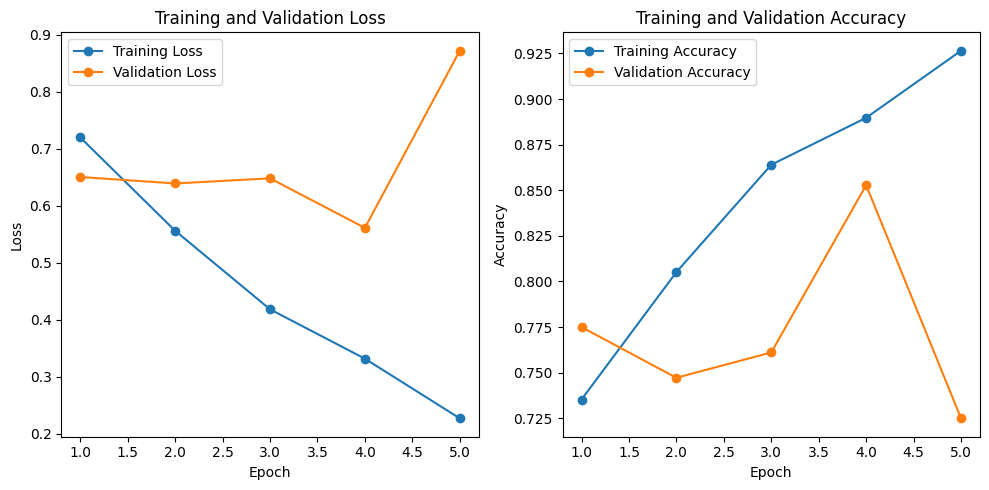

In [22]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

lr = 2e-5
num_epochs = 5
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

model.to(device)

train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    print(f'Epoch {epoch + 1}')
    train_loss, train_acc = train(model, train_loader, optimizer, criterion, device)
    val_loss, val_acc = evaluate(model, val_loader, criterion, device)

    print(f'Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}')

    # Save the loss and accuracy values
    train_accuracies.append(train_acc)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

# Plotting
epochs = range(1, num_epochs + 1)

plt.figure(figsize=(10, 5))

# Plotting Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Training Loss', marker='o')
plt.plot(epochs, val_losses, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracies, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Visualisasi

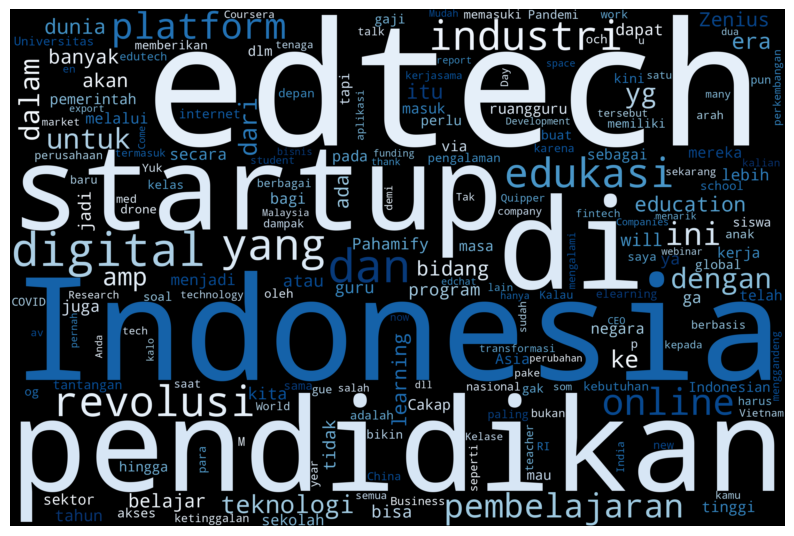

In [23]:
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

all_words = ' '.join([tweets for tweets in df['full_text']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(all_words)

plot_cloud(wordcloud)

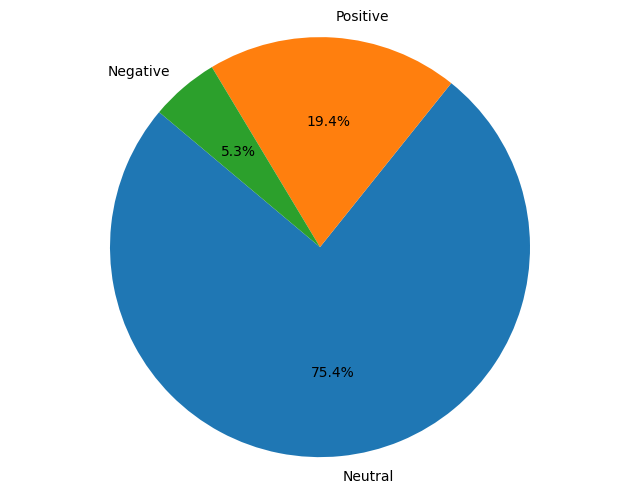

In [24]:
# Hitung jumlah tweet berdasarkan sentimen
sentiment_counts = dataset['Sentiment'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()